<a href="https://colab.research.google.com/github/lcbjrrr/ML315/blob/main/ML315_5_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees


Let's revist our monkey dataset...

In [15]:
import pandas as pd
train = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/ML315/refs/heads/main/datasets/monkeys%20-%20train.csv')
train.head(3)

,biting,tongue,smile,open_mouth,happy,sad,both_eyes_open,blink,x_eyes,closed_eyes,mask,glasses,wound,side_hair,bow
0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [4]:
X_train = train.drop('biting',axis=1)
y_train = train['biting']
X_train.head(2)

,tongue,smile,open_mouth,happy,sad,both_eyes_open,blink,x_eyes,closed_eyes,mask,glasses,wound,side_hair,bow
0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0


 A decision tree classifier is a supervised learning algorithm that uses a tree-like structure to categorize data. It works by asking a series of questions about the data's features, represented by internal nodes in the tree, and following branches based on the answers until it reaches a leaf node, which represents a specific category. During training, the algorithm learns the optimal questions to ask at each node to best separate the data into distinct categories. This makes decision trees highly interpretable, as the decision-making process is easily visualized. They can handle both categorical and numerical data and require minimal data preprocessing. However, they are prone to overfitting, where the tree becomes too complex and performs poorly on new data, which can be addressed with techniques like pruning.

![](https://i0.wp.com/spotintelligence.com/wp-content/uploads/2024/05/decision-tree-example-1024x576.jpg?resize=1024%2C576&ssl=1)


In [11]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train,y_train)
train_accuracy= tree.score(X_train,y_train)*100
train_accuracy

96.29629629629629

 This decision tree provides a classification model to identify whether a case is `fraud` or `clean` based on the "age" of individuals. At the top level, the model splits at `age <= 46.0`, indicating that younger individuals are more likely to exhibit fraudulent behavior. For those aged 46 or younger, further analysis at `age <= 28.5` highlights a higher concentration of fraud cases, with two sub-groups confirming fraud as the majority outcome. On the other hand, for individuals older than 46, the model splits again at `age <= 83.5`, where most cases are identified as `clean`. However, within this group, a small segment of older individuals (age > 83.5) shows a higher likelihood of fraud. The tree highlights key age thresholds where fraud risks shift, enabling businesses to focus fraud detection efforts on younger individuals and certain subsets of older age groups, while reducing scrutiny on middle-aged customers where fraud risk is minimal


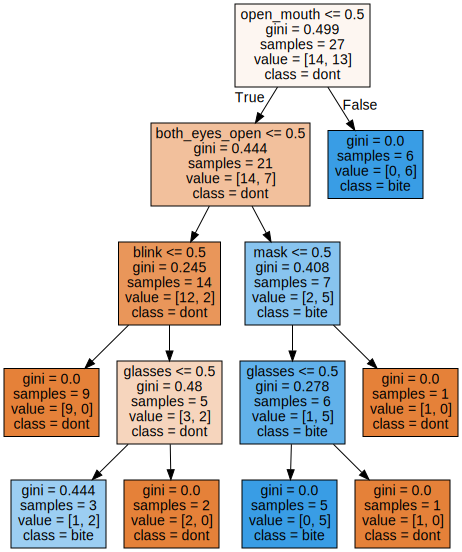

In [13]:
from sklearn.tree import export_graphviz
from graphviz import Source
Source(export_graphviz(tree,filled=True,
                           feature_names= X_train.columns,
                           class_names=['dont','bite']))

 `preds = tree.predict(X_test)` uses a trained decision tree model (tree) to generate predictions (preds) on a set of test data (X_test)


In [17]:
test = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/ML315/refs/heads/main/datasets/monkeys%20-%20test.csv')
test.head(3)
X_test = test.drop('biting',axis=1)
y_test = test['biting']
print(y_test)

0     0
1     1
2     0
3     0
4     1
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    1
Name: biting, dtype: int64


In [18]:
preds = tree.predict(X_test)
preds

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

We can calculate accuracy by dividing the number of correct predictions by the total number of predictions."""


In [19]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test,preds)*100
test_accuracy

92.3076923076923

A confusion matrix is a table that summarizes the performance of a classification model on a set of test data. It shows how many times the model correctly predicted each class and how many times it made incorrect predictions


[[8 1]
 [0 4]]


<Axes: >

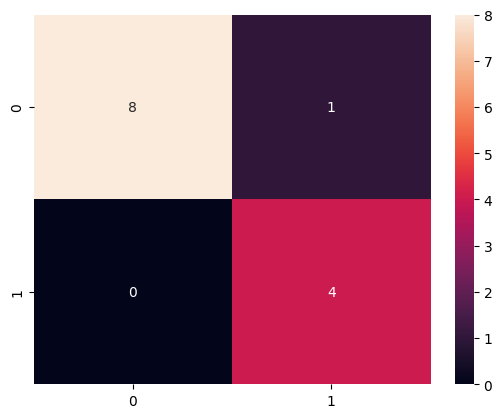

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")

Precision and recall are two important metrics used to evaluate the performance of a classification model. They are particularly useful when dealing with imbalanced datasets.

- Precision measures the proportion of positive identifications that were actually correct. In other words, it tells us how accurate the positive predictions are.

- Recall measures the proportion of actual positive cases that were correctly identified. It tells us how well the model finds all the relevant cases.



In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.80      1.00      0.89         4

    accuracy                           0.92        13
   macro avg       0.90      0.94      0.92        13
weighted avg       0.94      0.92      0.93        13

